In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
redwine_data=pd.read_csv("./drive/MyDrive/winequality-red.csv",sep=";")

whitewine_data=pd.read_csv("./drive/MyDrive/winequality-white.csv",sep=";")


In [ ]:
redwine_data['color']=1 #1이면 레드와인
whitewine_data['color']=0 #0이면 화이트와인

In [ ]:
totalData=pd.concat([redwine_data,whitewine_data])

In [ ]:
from sklearn.model_selection import train_test_split
x=totalData[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','quality']].to_numpy()
y=totalData['color']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
model.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = model.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {model.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.994
Mean accuracy score: 0.991


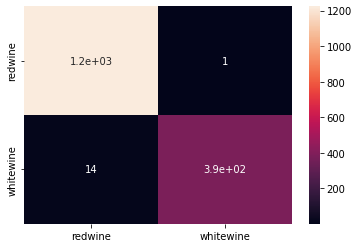

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=["redwine",'whitewine'], index=["redwine",'whitewine'])
sns.heatmap(cm, annot=True)